Mean Absolute Error = 2.817883663247082
R2 = 12.995524052107257


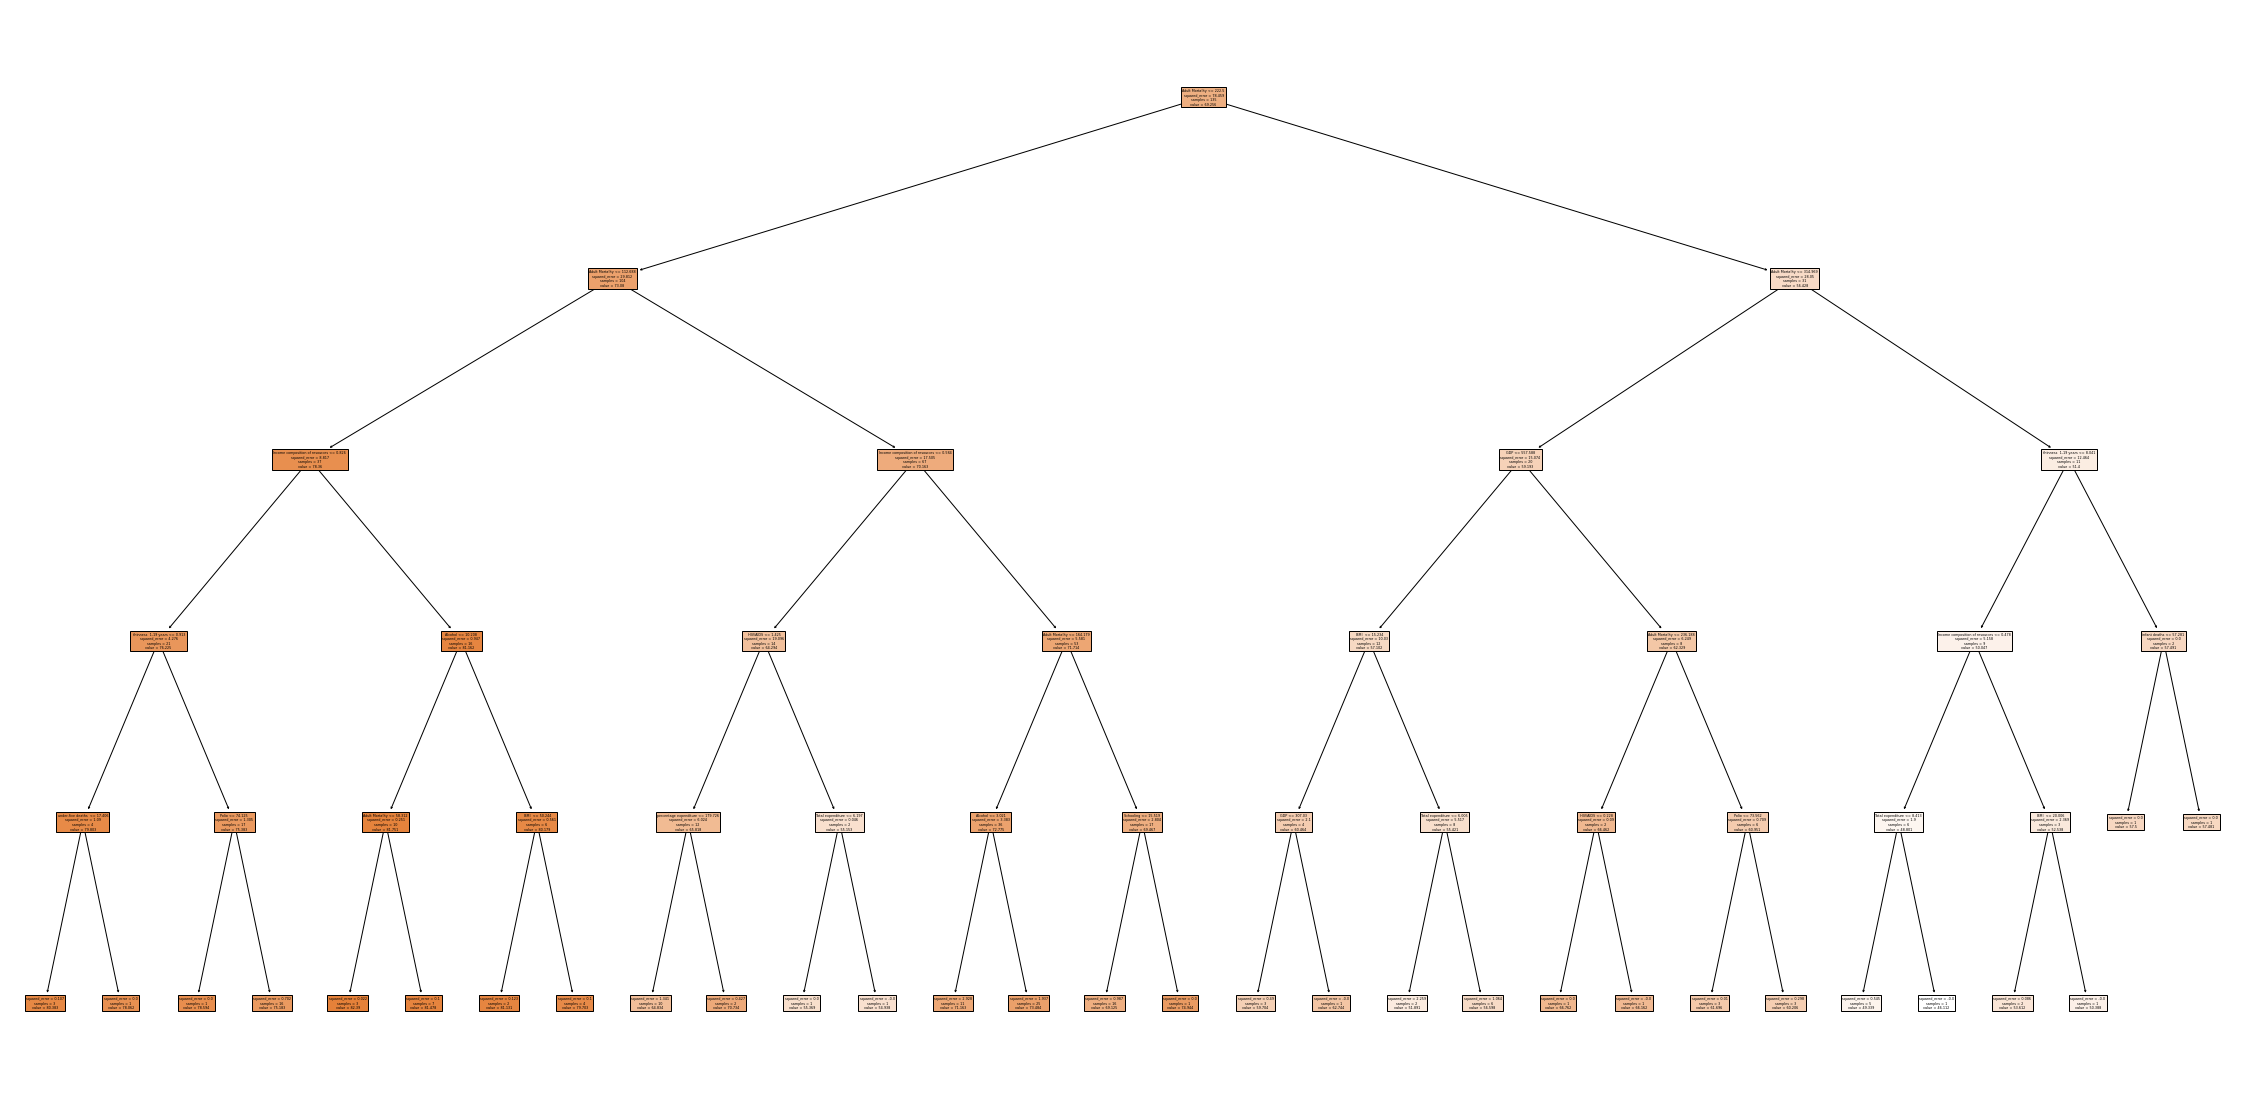

In [3]:
#decision tree
import pandas as pd
import numpy as np
import warnings
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from sklearn import utils
from sklearn import tree
import matplotlib.pyplot as plt

# Ignoring future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Cleaning data
data = pd.read_csv("Life Expectancy Data.csv")
data = data.groupby('Country').mean() # Grouping years by country
data = data.fillna(data.mean()) # Replacing NaN with mean values
data = data.drop(['Year'], axis=1)
data.sort_values(by = 'Life expectancy ', ascending = False)

# Loading data
X = data.drop(['Life expectancy '],axis = 1)
y = data['Life expectancy ']

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Training model
model = tree.DecisionTreeRegressor(max_depth = 5)
model.fit (X_train, y_train)

# Predicting model
y_predicted = model.predict(X_test)

feature_names = list(X.columns)

# Plotting figure
fig = plt.figure(figsize=(40,20))
fig = tree.plot_tree(model, feature_names = feature_names, filled = True)
plt.savefig('tree.pdf')
plt.show

# Measuring model
MAE = mean_absolute_error(y_test, y_predicted)
R2 = mean_squared_error(y_test, y_predicted)
print("Mean Absolute Error =", MAE)
print("R2 =", R2)